In [17]:
import json
import os

extractedData = {}
with open(os.getcwd() + "/self-output.json", 'r') as fp:
    extractedData = json.load(fp)
# print(extractedData)

analysedData = {}
for i, (key, val) in enumerate(extractedData.items()):
    # print(key, val)
    speakerID = key.strip().split('-')[0]
    if speakerID not in analysedData:
        analysedData[speakerID] = {}
    
    if 'totalCount' not in analysedData[speakerID]:
        analysedData[speakerID]['totalCount'] = 1
    else:
        analysedData[speakerID]['totalCount'] += 1
        
    if 'DSCount' not in analysedData[speakerID]:
        analysedData[speakerID]['DSCount'] = 0
    if val['DS']:
        analysedData[speakerID]['DSCount'] += 1
    
    if 'AvgSTOI' not in analysedData[speakerID]:
        analysedData[speakerID]['AvgSTOI'] = 0
    else:
        analysedData[speakerID]['AvgSTOI'] += eval(val['STOI'])

for (key, val) in analysedData.items():
    # print(key, val)
    analysedData[key]['DSR'] = val['DSCount'] / val['totalCount']

total_sum = 0
DS_sum = 0
stoi_sum = 0
for (key, val) in analysedData.items():
    # print(key, val)
    total_sum += val['totalCount']
    DS_sum += val['DSCount']
    stoi_sum += val['AvgSTOI']
    analysedData[key]['AvgSTOI'] /= analysedData[key]['totalCount']
    print(f"DSR for SpeakerID-{key} = {val['DSR'] * 100:.2f} %")
    print(f"AvgSTOI for SpeakerID-{key} = {val['AvgSTOI']:.2f}")
    

stoi_avg = stoi_sum / total_sum
# print(total_sum)
# print(DS_sum)
print(f"DSR for All Speakers = {DS_sum/total_sum * 100:.2f} %")
print(f"STOI for All Speakers = {stoi_avg:.2f}")

DSR for SpeakerID-HLJ = 70.00 %
AvgSTOI for SpeakerID-HLJ = 0.50
DSR for SpeakerID-CJT = 80.00 %
AvgSTOI for SpeakerID-CJT = 0.42
DSR for All Speakers = 75.00 %
STOI for All Speakers = 0.46


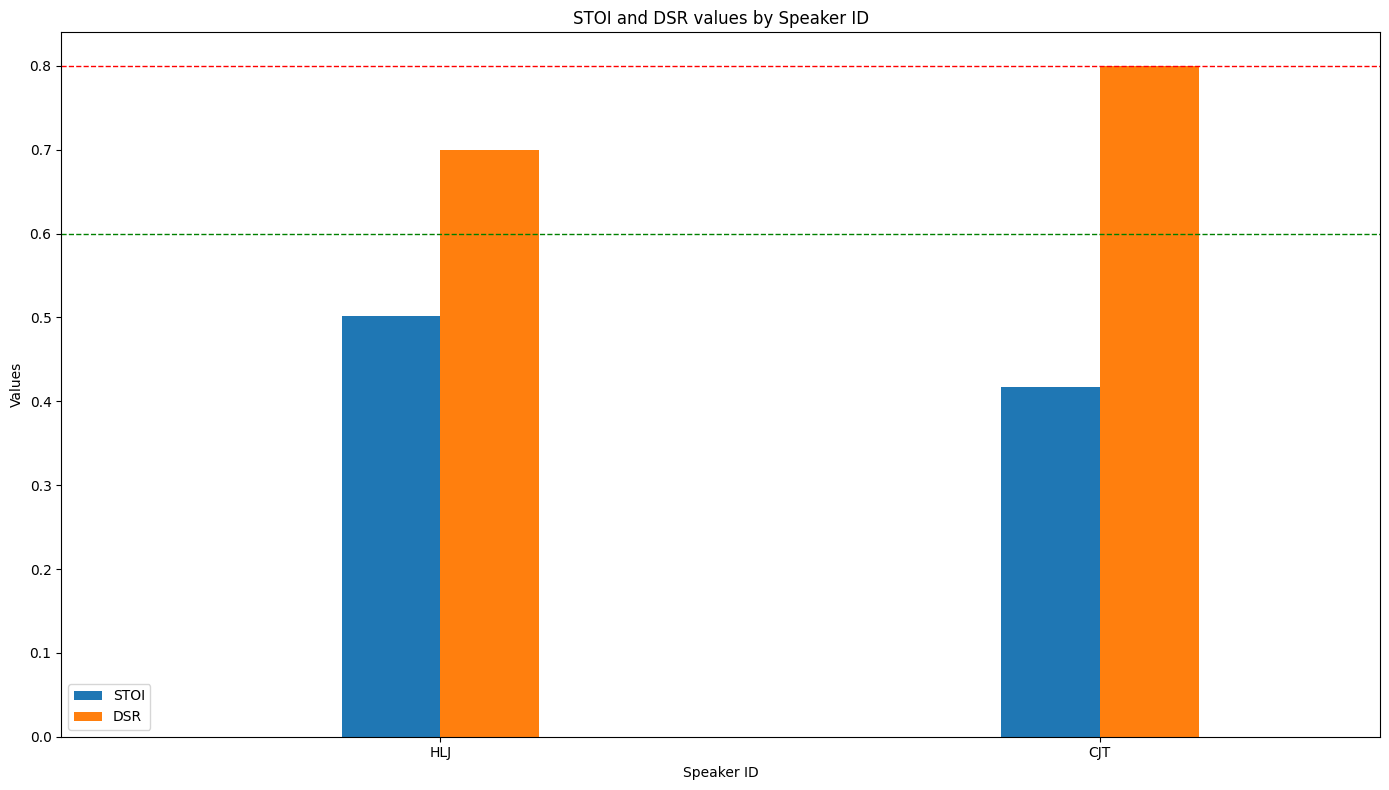

spearker 数量:  2
DSR超过80.0%的speaker数量:  0


In [18]:
# print(analysedData)
with open(os.getcwd() + '/analysedData.json', 'w') as fp:
    json.dump(analysedData, fp)
    
import matplotlib.pyplot as plt
data = analysedData  # 画图数据

# 解析数据，获取ID和对应的AvgSTOI和DSR值
ids = list(data.keys())
avg_stoi_values = [stats['AvgSTOI'] for stats in data.values()]
dsr_values = [stats['DSR'] for stats in data.values()]

# 设置条形图宽度
bar_width = 0.15
# 设置ID在x轴上的位置
import numpy as np
index = np.arange(len(ids)) * 1

# 创建一个图和一个子图
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制STOI的条形图
stoi_bars = ax.bar(index, avg_stoi_values, bar_width, label='STOI')

# 绘制DSR的条形图
dsr_bars = ax.bar([i + bar_width for i in index], dsr_values, bar_width, label='DSR')

# 添加图例
ax.legend()

# 设置x轴标签
ax.set_xlabel('Speaker ID')
# 设置y轴标签
ax.set_ylabel('Values')
# 设置图表标题
ax.set_title('STOI and DSR values by Speaker ID')

# 设置x轴刻度标签
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(ids, rotation=0)
ax.set_xlim(-0.5, 1.5)

# 在y=0.8处画一条虚线
plt.axhline(y=0.8, color='r', linestyle='--', linewidth=1)
# 在y=0.6处画一条虚线
plt.axhline(y=0.6, color='g', linestyle='--', linewidth=1)

# 显示图表
plt.tight_layout()
plt.show()

# 人数情况
totalCount = 0
AvgDSCount = 0 
DSRThreshold = 0.8
for (key, val) in analysedData.items():
    # print(key, val)
    totalCount += 1
    if analysedData[key]['DSR'] > DSRThreshold:
        AvgDSCount += 1
print("spearker 数量: ", totalCount)
print(f"DSR超过{DSRThreshold*100}%的speaker数量: ", AvgDSCount)
# print(f"STOI")


In [19]:
analysedData = {}
with open(os.getcwd() + '/self-WADoutput.json', 'r') as fp:
    analysedData = json.load(fp)
# print(analysedData)

data = {}
for (key, val) in analysedData.items():
    speakerID = key.split('-')[0]
    if speakerID not in data:
        data[speakerID] = {'cnt': 0, 'WAD_Sum': 0, 'AvgWAD': 0}
    data[speakerID]['cnt'] += 1
    data[speakerID]['WAD_Sum'] += eval(val['WAD'])
for (key, val) in data.items():
    speakerID = key.split('-')[0]
    data[speakerID]['AvgWAD'] = data[speakerID]['WAD_Sum'] / data[speakerID]['cnt']
print(data)



{'HLJ': {'cnt': 10, 'WAD_Sum': 10.042773892773893, 'AvgWAD': 1.0042773892773893}, 'CJT': {'cnt': 10, 'WAD_Sum': 9.454800101858925, 'AvgWAD': 0.9454800101858926}}


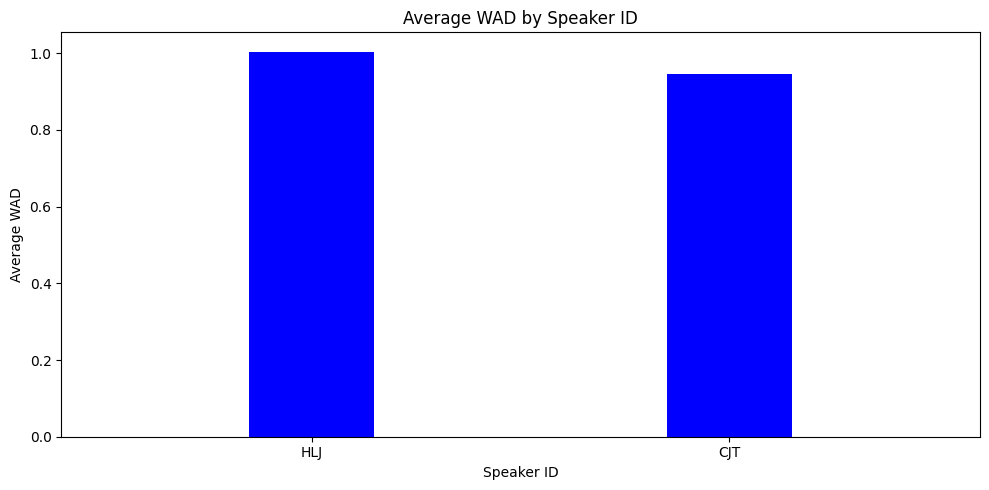

In [20]:
# 解析数据，获取ID和对应的AvgWAD值
ids = list(data.keys())
avg_wad_values = [stats['AvgWAD'] for stats in data.values()]

bar_width = 0.15
import numpy as np 
index = np.arange(len(ids)) * 0.5

plt.figure(figsize=(10, 5))
plt.bar(index, avg_wad_values, bar_width, color='blue')

plt.xlim(-0.3, 0.8)
plt.xlabel('Speaker ID')
plt.ylabel('Average WAD')
plt.title('Average WAD by Speaker ID')
plt.xticks(index, ids, rotation=0)

plt.tight_layout() 
plt.show()